In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [72]:

def make_plots_each_algorithm(df_path):
    
    
    df = pd.read_csv(df_path)



    columns = list(df.columns)
    # conf_mat_cols = [col for col in columns if col.split("-")[1] in ['TP','TN','FP','FN']]
    # confusion matrix value we not need for now
    # df = df[(df["Score"] < 1) & (df['Score'] != 0)]

    df = df[df['Metrics'].apply(lambda x: False if x.split("-")[1] in ['TP','TN','FP','FN','FalsePositiveRate','FalseNegativeRate'] else True)]

    df['Score'] = round(df['Score'],2)

    df['Set'] = df['Metrics'].apply(lambda x: x.split("-")[0])

    return df


    algorithms = df['Algorithm'].unique().tolist()
    imbalance_mets = df['Imbalance'].unique().tolist()

    
    for algorithm in algorithms:

        for imb in imbalance_mets:
            

        
            alg_df = df[(df['Algorithm']==algorithm) & (df['Imbalance']==imb)].copy()
            sns.barplot(alg_df,x='Metrics',y='Score')
            plt.title(algorithm + ", " + imb)
            plt.xticks(rotation=45)
            plt.show()
                    
    


# def make_plots_each_metric()


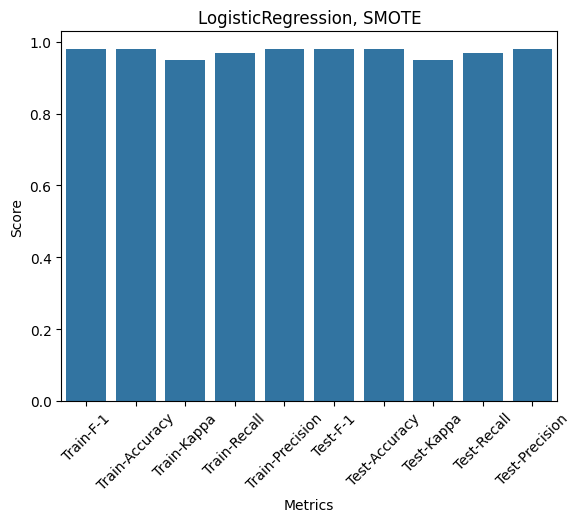

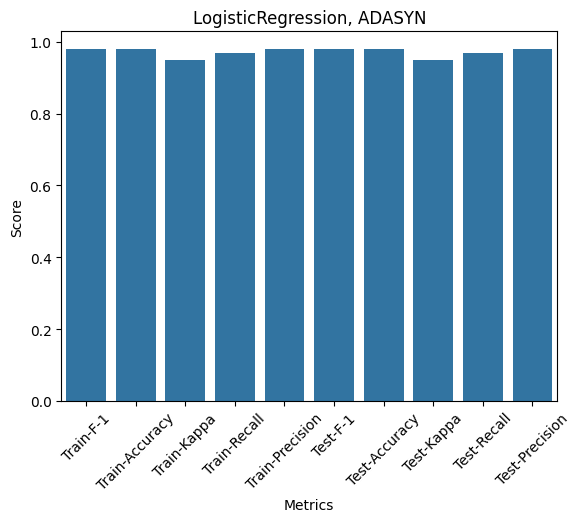

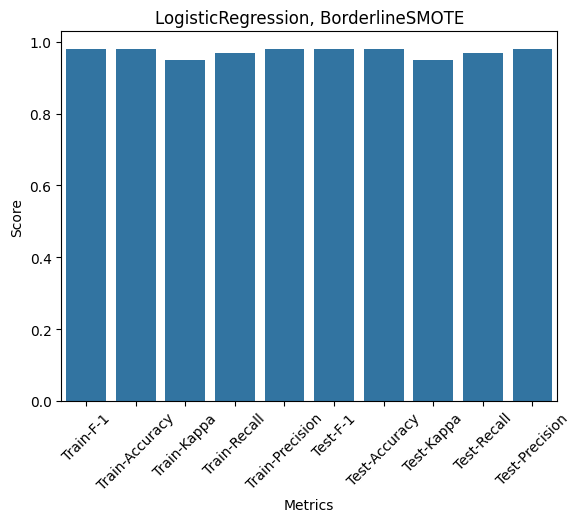

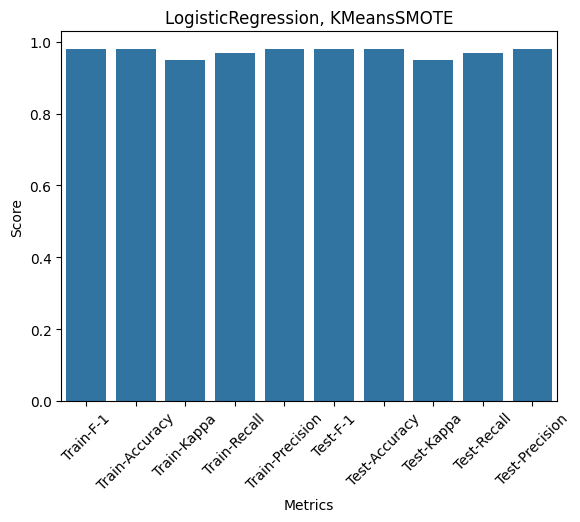

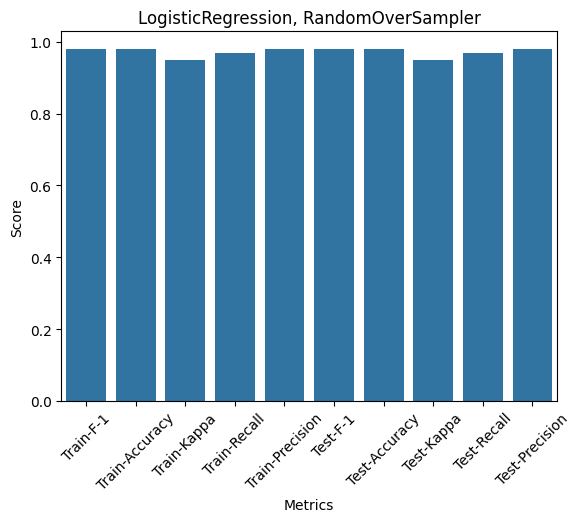

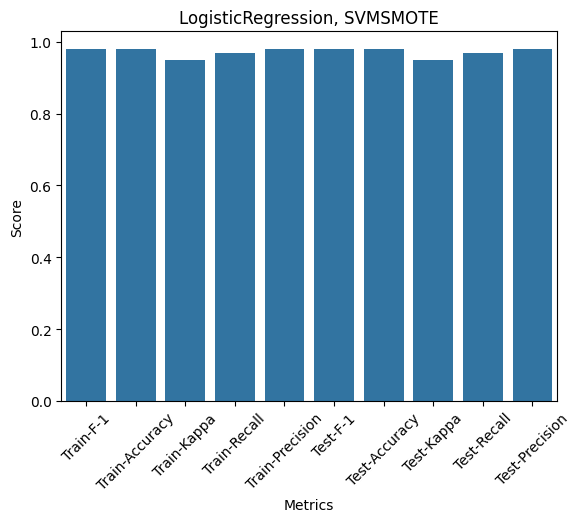

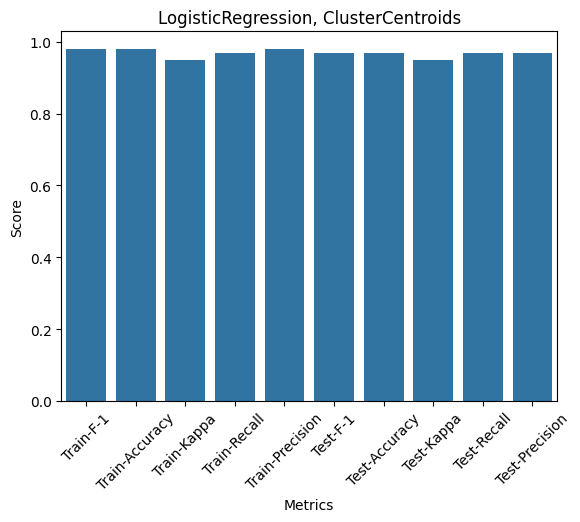

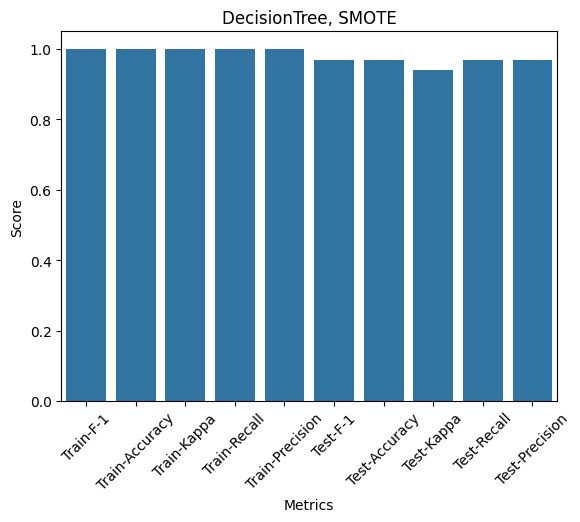

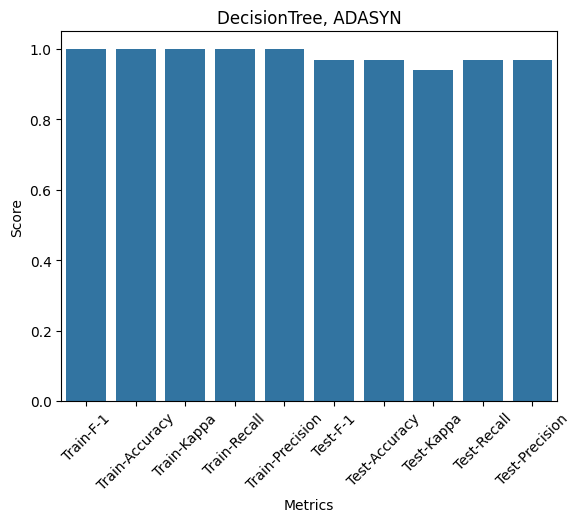

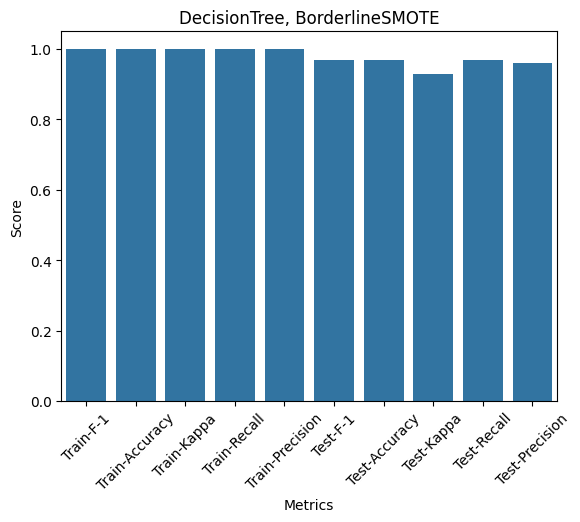

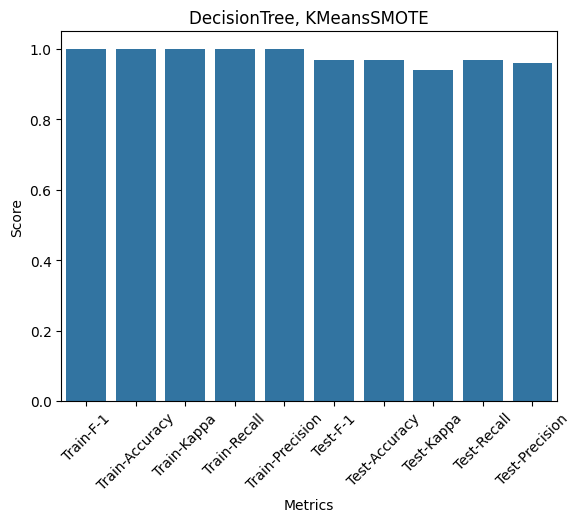

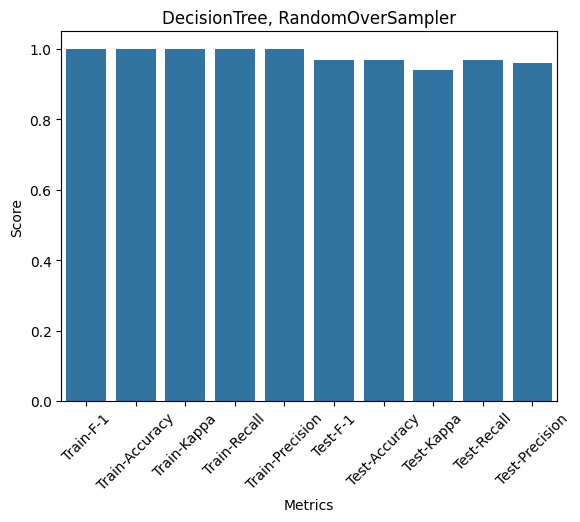

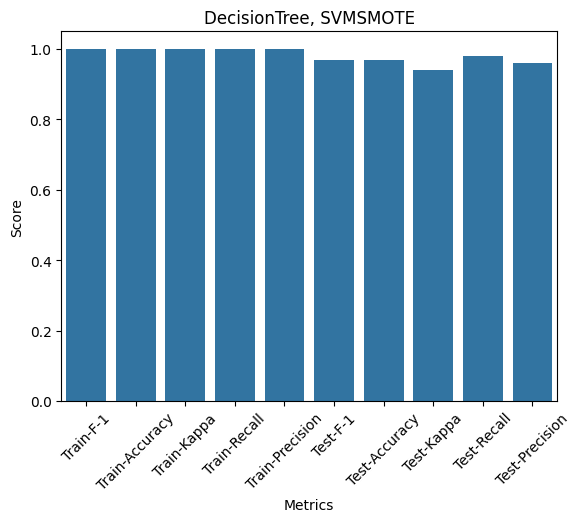

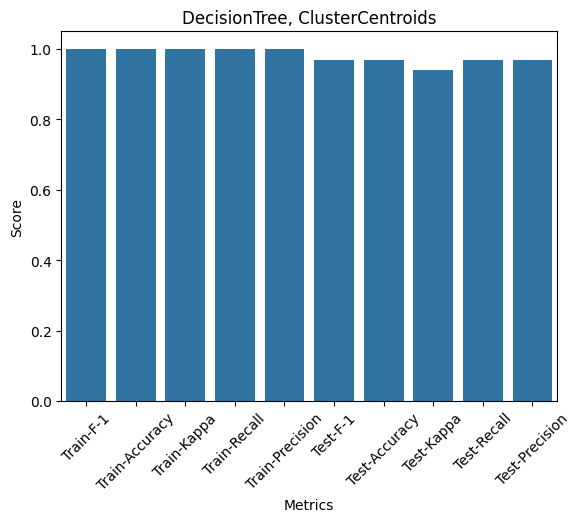

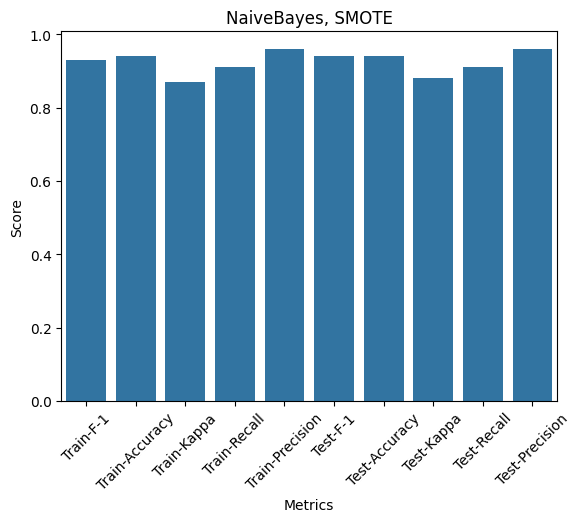

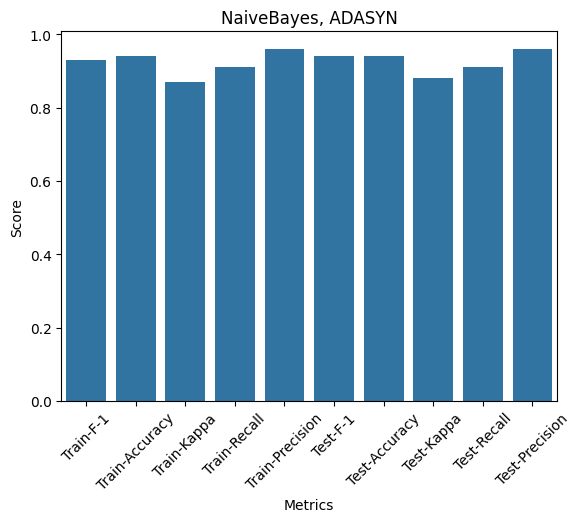

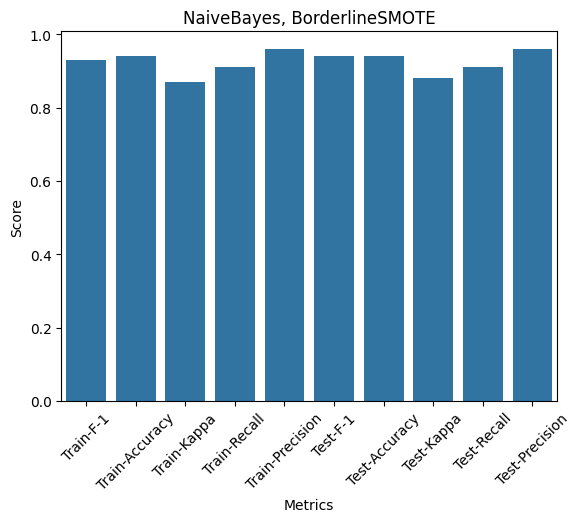

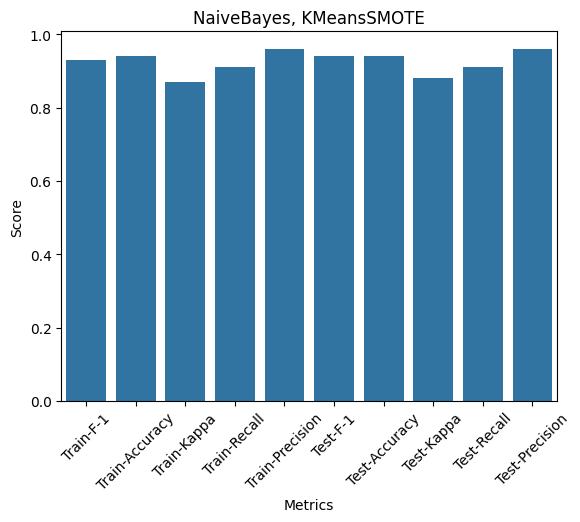

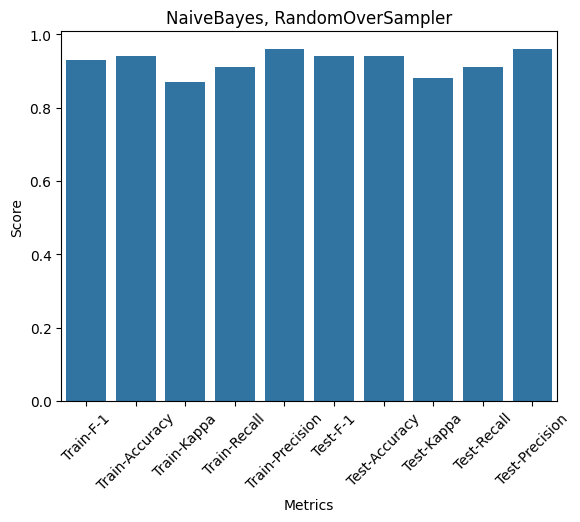

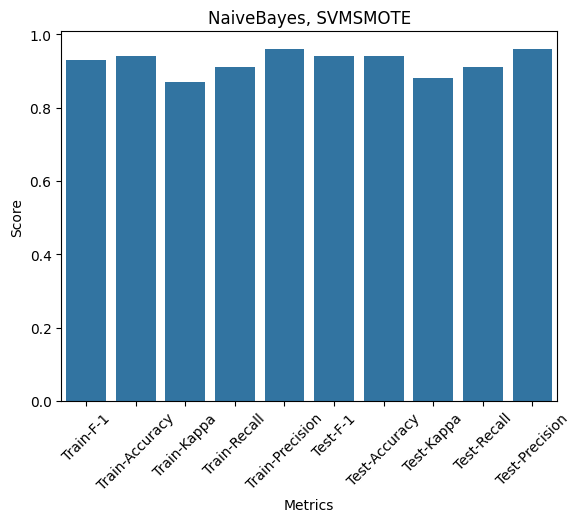

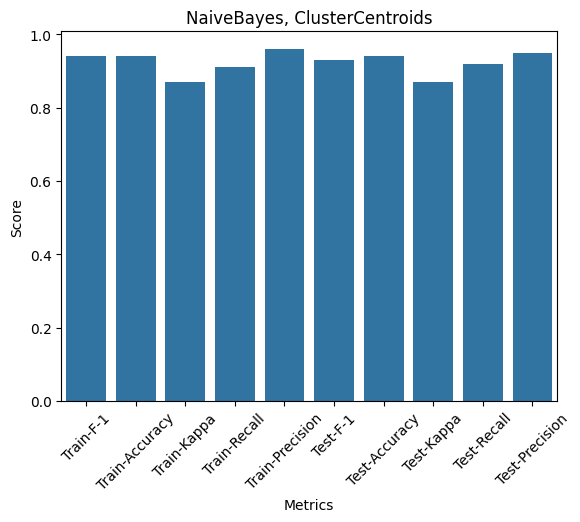

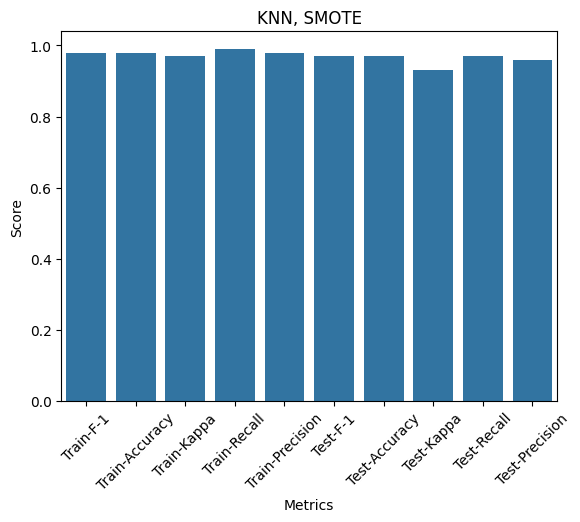

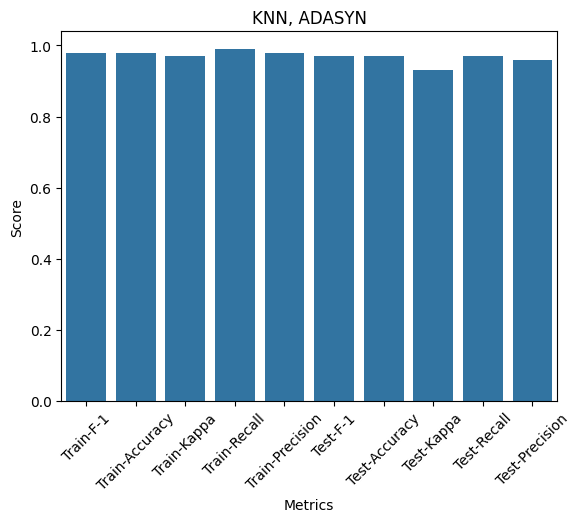

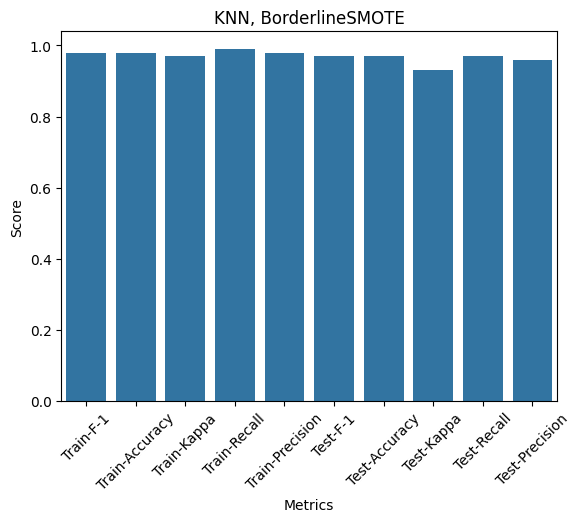

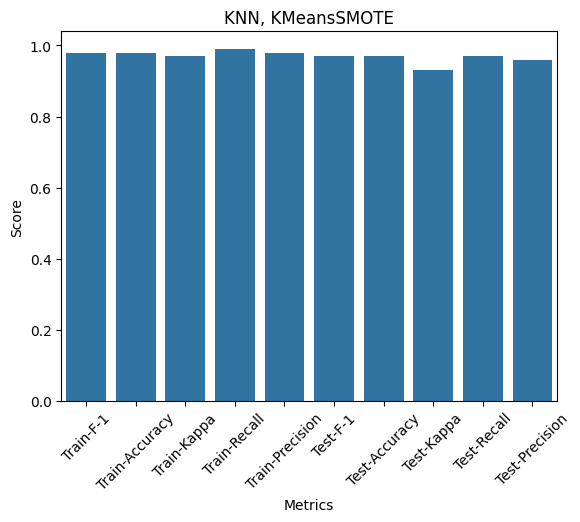

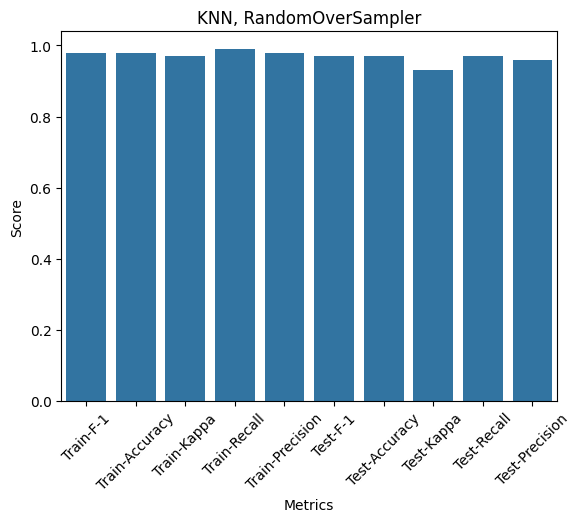

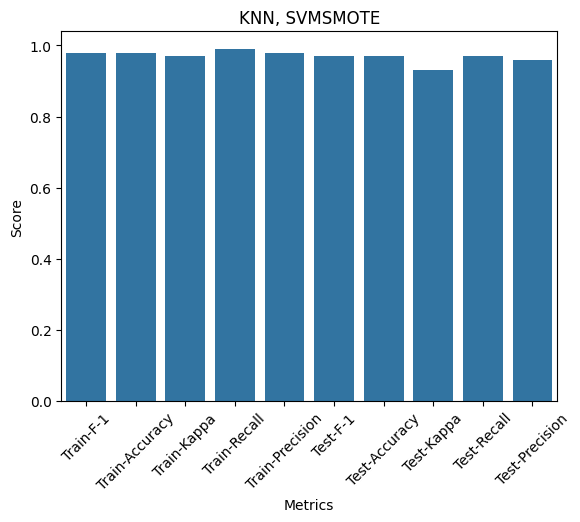

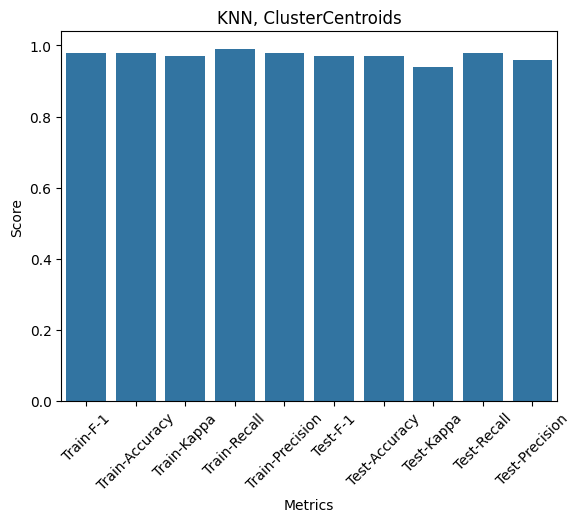

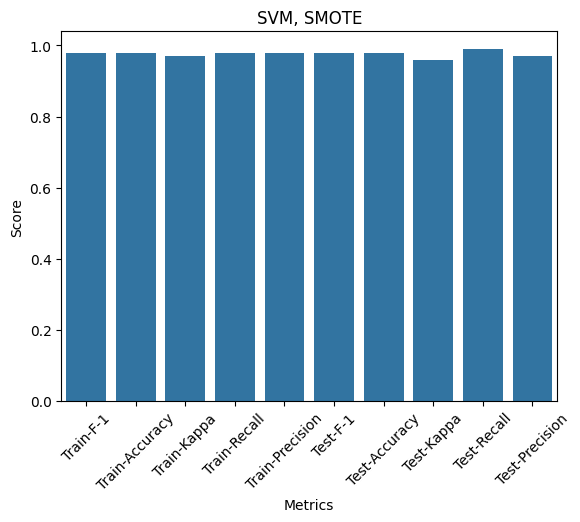

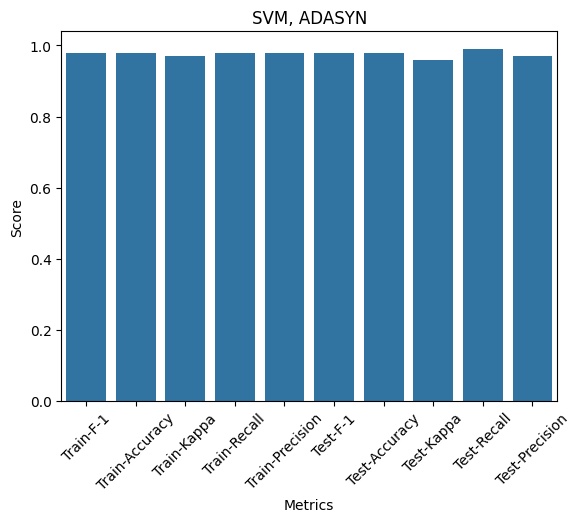

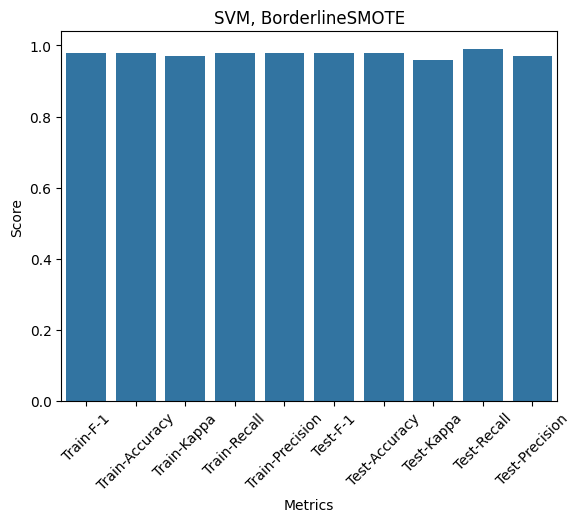

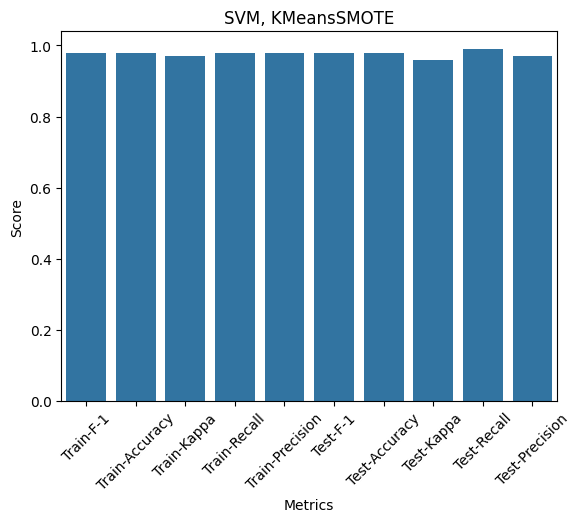

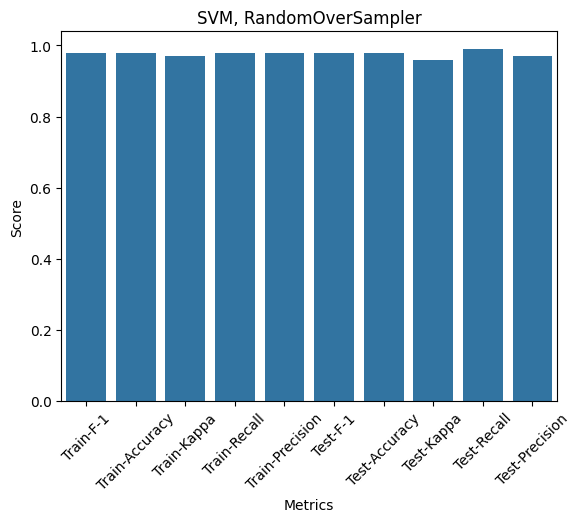

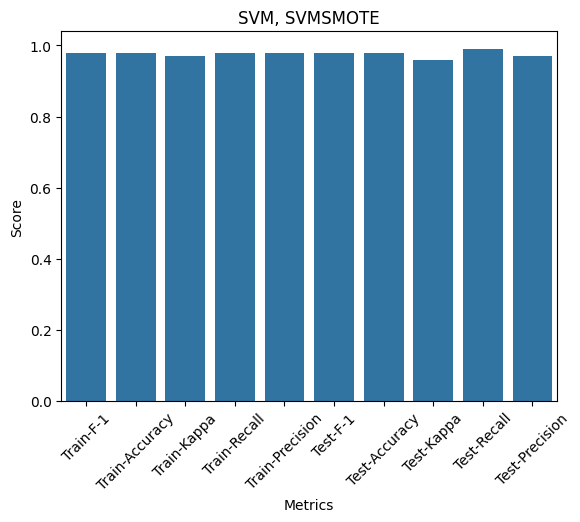

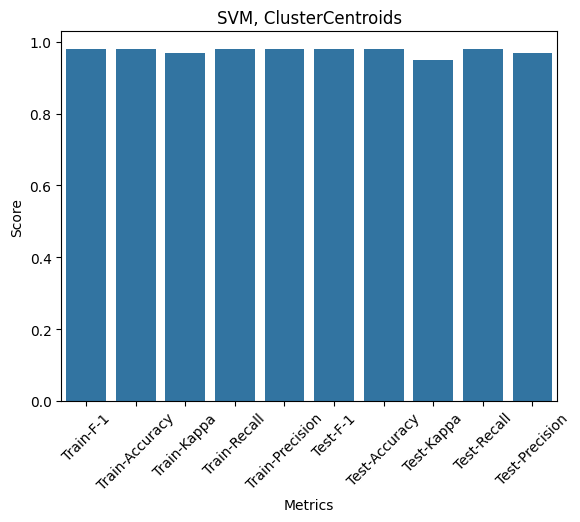

['LogisticRegression', 'DecisionTree', 'NaiveBayes', 'KNN', 'SVM']


In [62]:
df = make_plots_each_algorithm("../src/results/first_attempt_result.csv")

In [55]:
df

,Algorithm,ImputerNum,ImputerCat,Imbalance,Metrics,Score
30,LogisticRegression,SimpleImputer_mean,SimpleImputer_mode,ClusterCentroids,Train-F-1,0.98
65,LogisticRegression,SimpleImputer_mean,SimpleImputer_mode,ClusterCentroids,Train-Accuracy,0.98
100,LogisticRegression,SimpleImputer_mean,SimpleImputer_mode,ClusterCentroids,Train-Kappa,0.95
275,LogisticRegression,SimpleImputer_mean,SimpleImputer_mode,ClusterCentroids,Train-Recall,0.97
310,LogisticRegression,SimpleImputer_mean,SimpleImputer_mode,ClusterCentroids,Train-Precision,0.98
415,LogisticRegression,SimpleImputer_mean,SimpleImputer_mode,ClusterCentroids,Test-F-1,0.97
450,LogisticRegression,SimpleImputer_mean,SimpleImputer_mode,ClusterCentroids,Test-Accuracy,0.97
485,LogisticRegression,SimpleImputer_mean,SimpleImputer_mode,ClusterCentroids,Test-Kappa,0.95
660,LogisticRegression,SimpleImputer_mean,SimpleImputer_mode,ClusterCentroids,Test-Recall,0.97
695,LogisticRegression,SimpleImputer_mean,SimpleImputer_mode,ClusterCentroids,Test-Precision,0.97


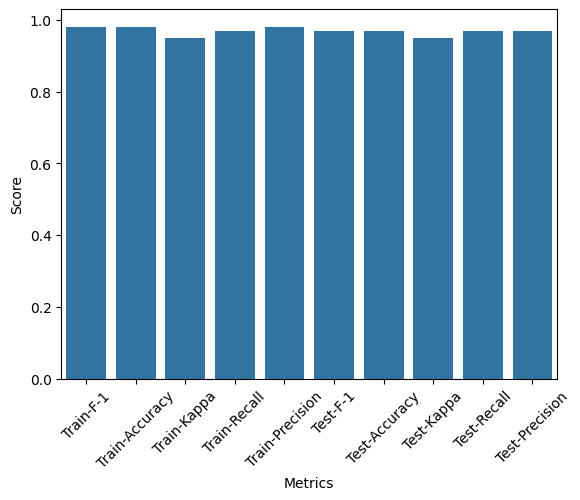

In [65]:
df = pd.read_csv("../src/results/first_attempt_result.csv")

In [73]:
df = make_plots_each_algorithm("../src/results/first_attempt_result.csv")

In [74]:
df

,Algorithm,ImputerNum,ImputerCat,Imbalance,Metrics,Score,Set
0,LogisticRegression,SimpleImputer_mean,SimpleImputer_mode,SMOTE,Train-F-1,0.98,Train
1,DecisionTree,SimpleImputer_mean,SimpleImputer_mode,SMOTE,Train-F-1,1.00,Train
2,NaiveBayes,SimpleImputer_mean,SimpleImputer_mode,SMOTE,Train-F-1,0.93,Train
3,KNN,SimpleImputer_mean,SimpleImputer_mode,SMOTE,Train-F-1,0.98,Train
4,SVM,SimpleImputer_mean,SimpleImputer_mode,SMOTE,Train-F-1,0.98,Train
...,...,...,...,...,...,...,...
695,LogisticRegression,SimpleImputer_mean,SimpleImputer_mode,ClusterCentroids,Test-Precision,0.97,Test
696,DecisionTree,SimpleImputer_mean,SimpleImputer_mode,ClusterCentroids,Test-Precision,0.97,Test
697,NaiveBayes,SimpleImputer_mean,SimpleImputer_mode,ClusterCentroids,Test-Precision,0.95,Test
698,KNN,SimpleImputer_mean,SimpleImputer_mode,ClusterCentroids,Test-Precision,0.96,Test


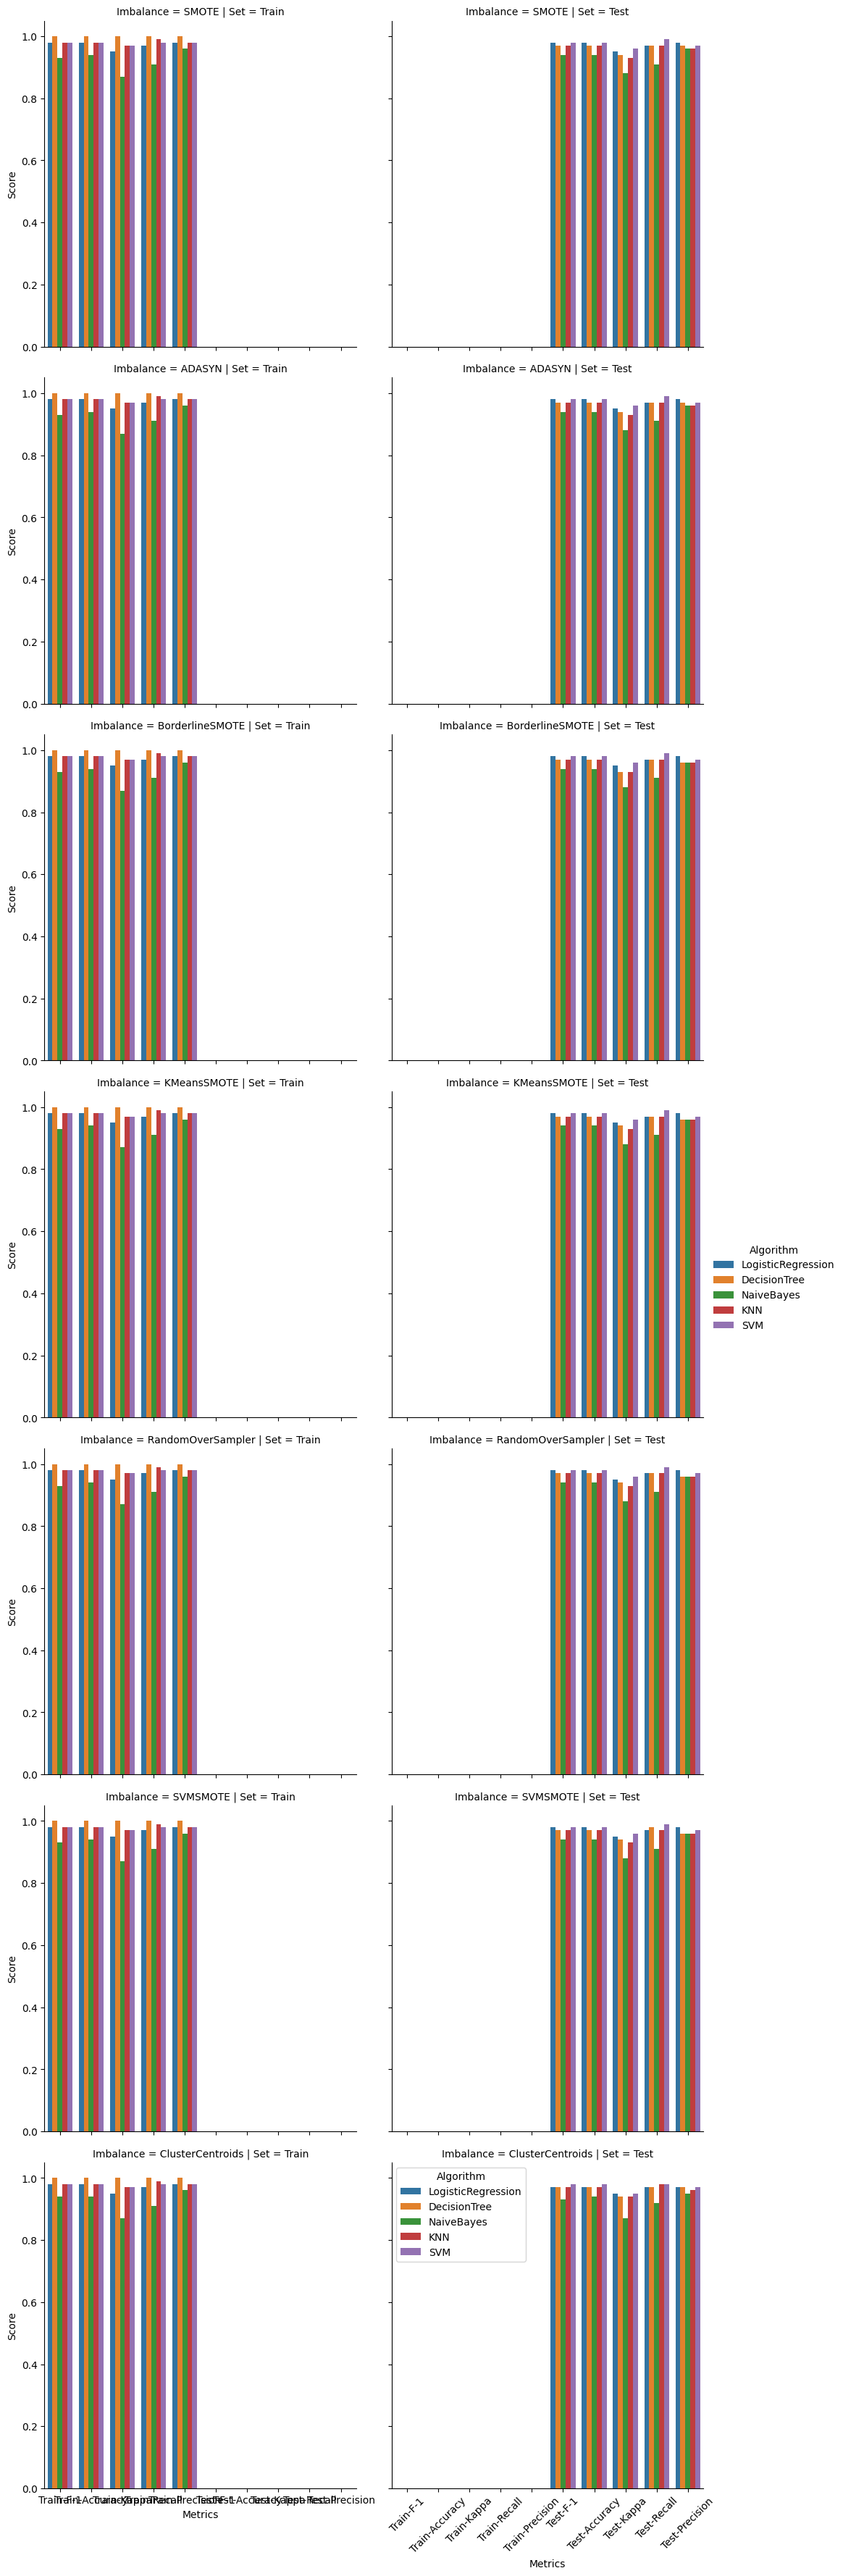

In [88]:
grid = sns.catplot(df,x='Metrics',y='Score',kind='bar',row='Imbalance',col='Set',hue='Algorithm',legend=True)

# for ax in grid.axes.flat:
#     ax.legend(title='Algorithm', loc='upper right')
plt.xticks(rotation=45)
plt.legend(title='Algorithm')
plt.show()